In [1]:
from PIL import Image, ImageDraw
import os

In [97]:
tg_folder = '/Volumes/My Passport/AB'
to_folder = '/Volumes/My Passport/AB/to'
files = os.listdir(tg_folder)
len(files)

# 숨김 파일 제외한 파일들 조회
filenames = [f for f in os.listdir(tg_folder) if not f.startswith('.')]
len(filenames)

379

In [13]:
files[0]
os.path.join(tg_folder,filenames[0])

'/Volumes/My Passport/AB/IMG_0015.PNG'

1668 2388


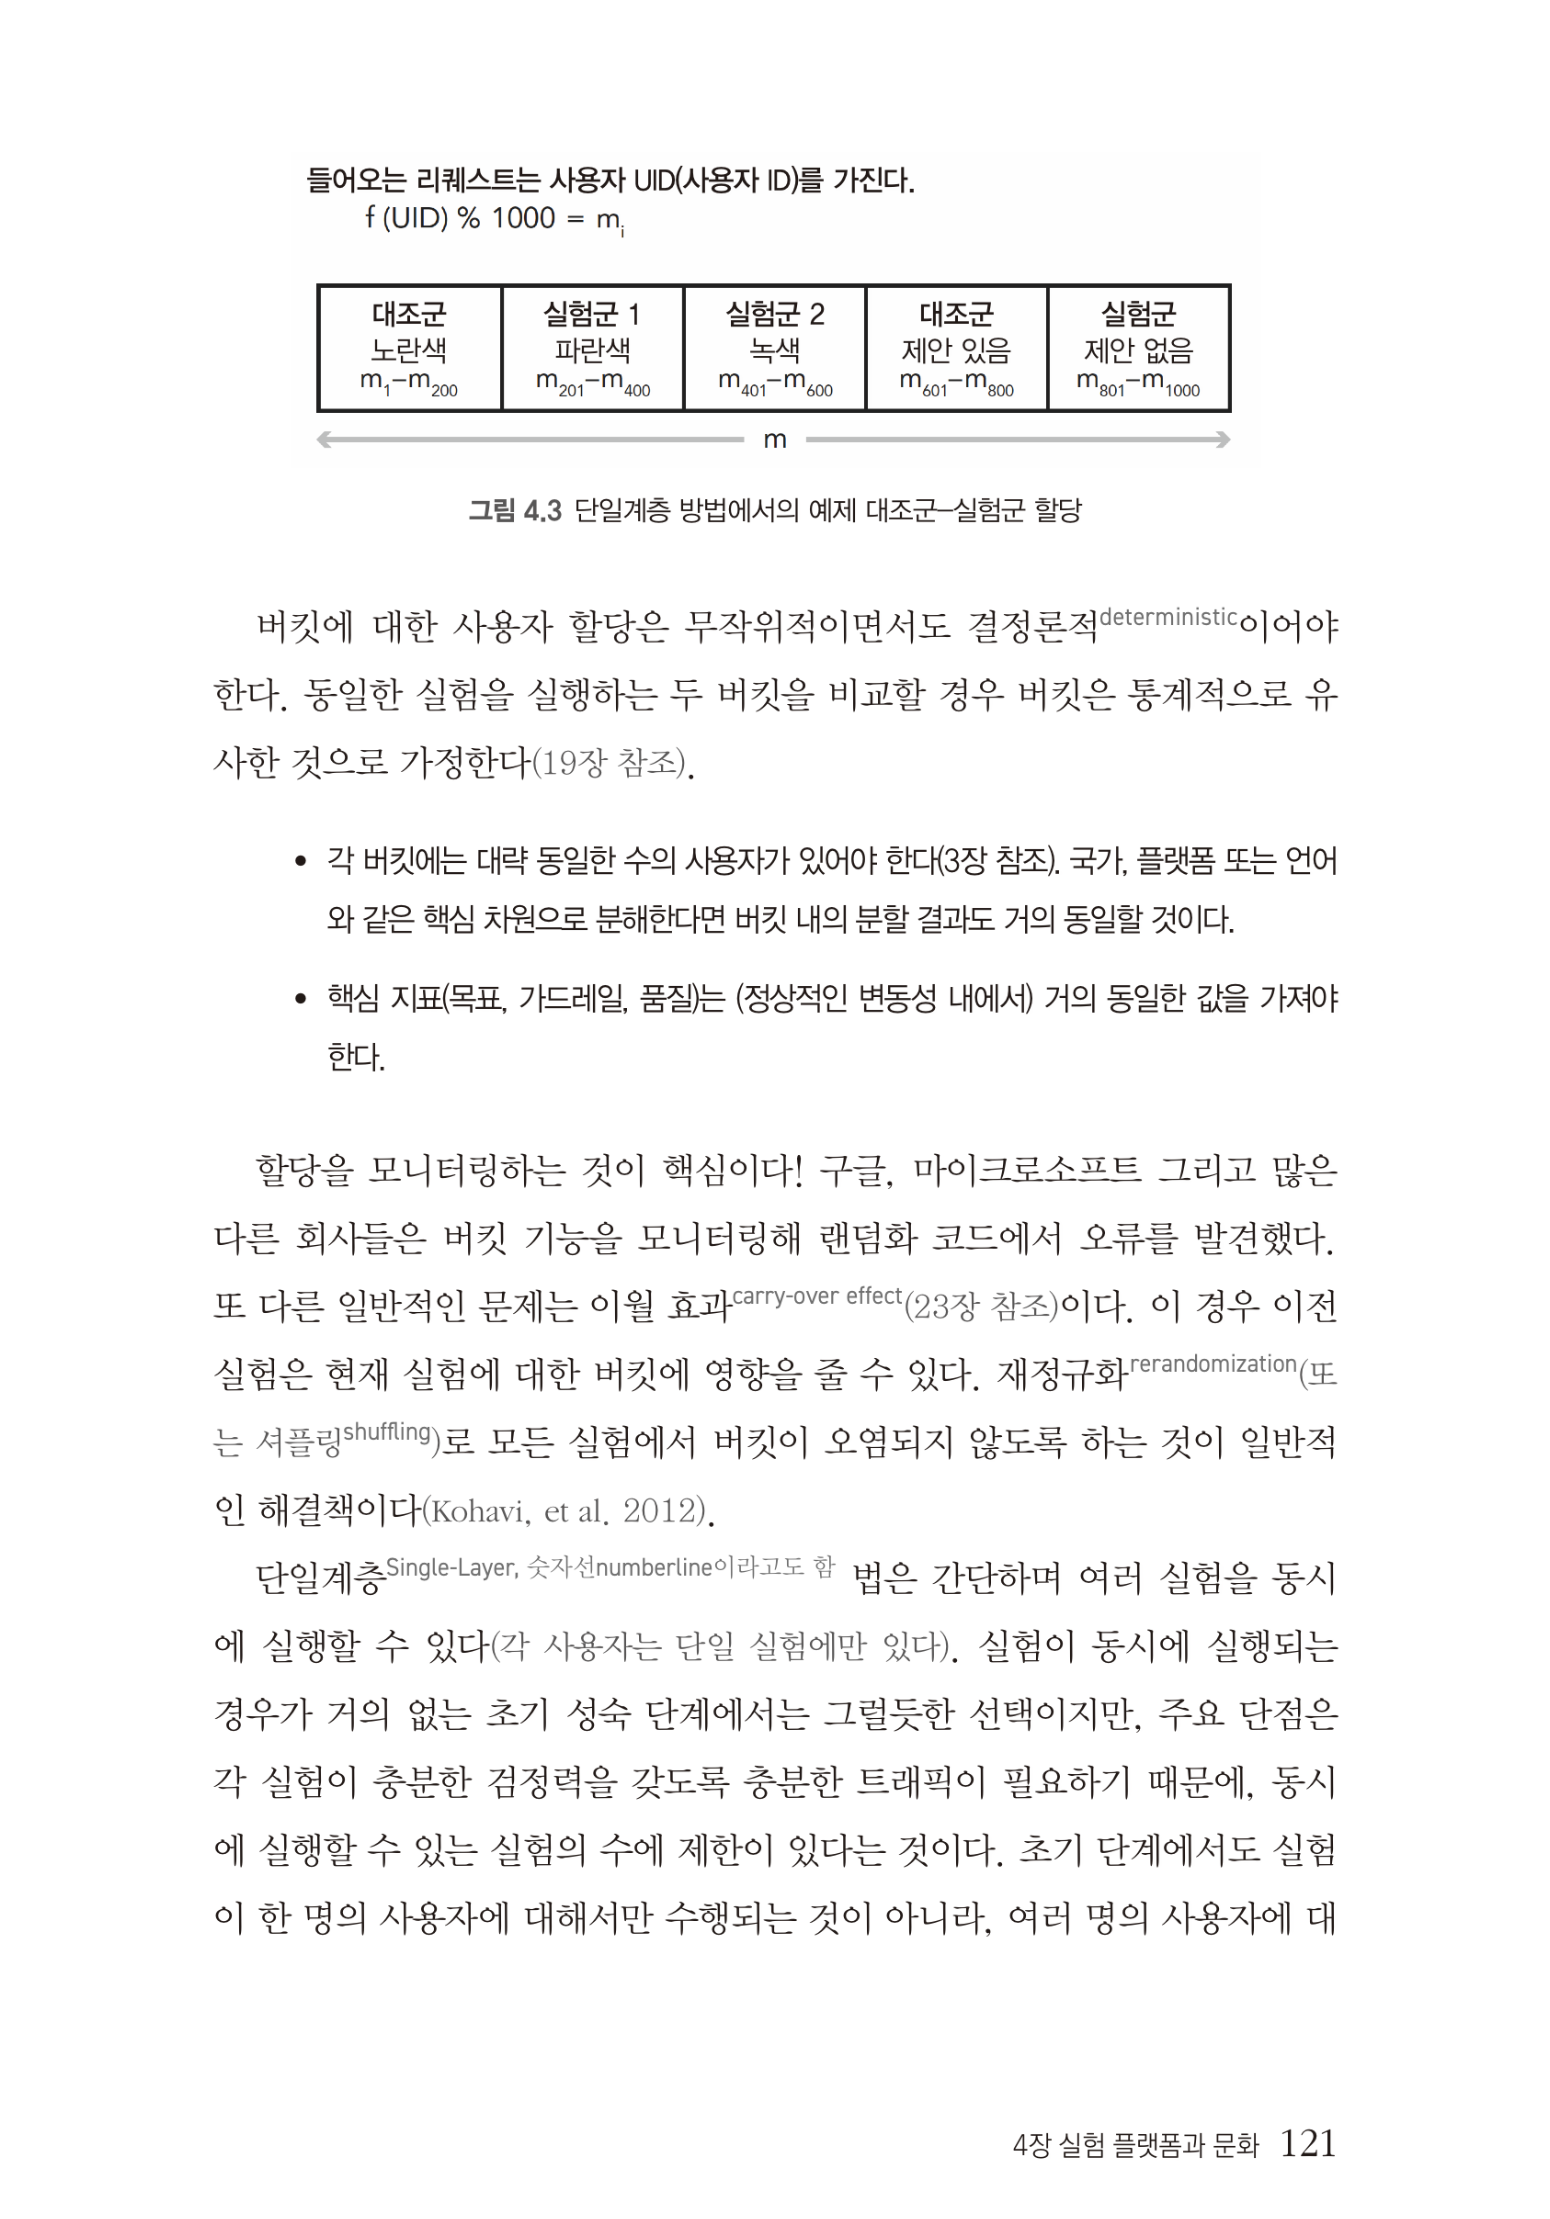

In [125]:
# 테스트

img = Image.open(os.path.join(tg_folder,filenames[120]))
draw = ImageDraw.Draw(img)
    
# 여백 채우기
x1_start, y1_start = 0, 0
x1_end, y1_end = 64, 2388
x2_start, y2_start = img.width - 64, 0
x2_end, y2_end = img.width, 2388
x3_start, y3_start = 0,0
x3_end, y3_end = img.width, 29
x4_start, y4_start = 0,img.height - 29
x4_end, y4_end = img.width, img.height

# 그림 그리기
draw.rectangle([(x1_start, y1_start),(x1_end,y1_end)], fill='white')
draw.rectangle([(x2_start, y2_start),(x2_end,y2_end)], fill='white')
draw.rectangle([(x3_start, y3_start),(x3_end,y3_end)], fill='white')
draw.rectangle([(x4_start, y4_start),(x4_end,y4_end)], fill='white')

# 원본 이미지의 크기
original_width = img.width
original_height = img.height

# 원하는 크롭 영역의 크기 (새로운 가로 및 세로 크기)
new_width = 1550  # 원하는 가로 크기
new_height = (new_width * original_height) // original_width  # 비율 유지

# 크롭 영역 계산
left = (original_width - new_width) // 2
upper = (original_height - new_height) // 2
right = left + new_width
lower = upper + new_height

# 크롭 수행
cropped = img.crop((left, upper, right, lower))



print(img.width, img.height)
cropped

In [127]:

def do_paint(img):
    draw = ImageDraw.Draw(img)
    
    # 여백 채우기
    x1_start, y1_start = 0, 0
    x1_end, y1_end = 64, 2388
    x2_start, y2_start = img.width - 64, 0
    x2_end, y2_end = img.width, 2388
    x3_start, y3_start = 0,0
    x3_end, y3_end = img.width, 29
    x4_start, y4_start = 0,img.height - 29
    x4_end, y4_end = img.width, img.height

    # 그림 그리기
    draw.rectangle([(x1_start, y1_start),(x1_end,y1_end)], fill='white')
    draw.rectangle([(x2_start, y2_start),(x2_end,y2_end)], fill='white')
    draw.rectangle([(x3_start, y3_start),(x3_end,y3_end)], fill='white')
    draw.rectangle([(x4_start, y4_start),(x4_end,y4_end)], fill='white')

    # 원본 이미지의 크기
    original_width = img.width
    original_height = img.height

    # 원하는 크롭 영역의 크기 (새로운 가로 및 세로 크기)
    new_width = 1550  # 원하는 가로 크기
    new_height = (new_width * original_height) // original_width  # 비율 유지

    # 크롭 영역 계산
    left = (original_width - new_width) // 2
    upper = (original_height - new_height) // 2
    right = left + new_width
    lower = upper + new_height

    # 크롭 수행
    cropped = img.crop((left, upper, right, lower))

    return cropped


for i in filenames:
    img = Image.open(os.path.join(tg_folder,i))
    img = do_paint(img)
    img.save(os.path.join(to_folder,i))



IsADirectoryError: [Errno 21] Is a directory: '/Volumes/My Passport/AB/to'

In [128]:
# pdf화
filenames = [f for f in os.listdir(to_folder) if not f.startswith('.')]
img_list = []

for i in filenames:
    img = Image.open(os.path.join(to_folder,i))
    img = img.convert('RGB')
    img_list.append(img)

img_main = img_list[0]
img_list[1:]

img_main.save('ab_cropped.pdf',save_all=True,append_images=img_list)

In [132]:
# PDF 목차 생성
from pypdf import PdfReader, PdfWriter

reader = PdfReader("/Volumes/My Passport/도서/AB 테스트.pdf")  # open input
writer = PdfWriter()  # open output

n = len(reader.pages)
print(n)
for i in range(n):
    writer.add_page(reader.pages[i])  # insert page

for key,value in enumerate(parents):
    if value in sons:
        par = writer.add_outline_item(value, parents[value] - 1, parent=None)
        for i in range(len(sons[value])):
            print(sons[value][i]['title'])
            writer.add_outline_item(sons[value][i]['title'], sons[value][i]['page'] - 1, parent=par)
    else:
        writer.add_outline_item(value, parents[value] - 1, parent=None)


with open("result.pdf", "wb") as fp:  # creating result pdf JCT
    writer.write(fp)  # writing to result pdf JCT
    
    

378
01. 소개와 동기
02. 실험의 실행과 분석-엔드-투-엔드 예제
03. 트위먼의 법칙과 실험의 신뢰도
04. 실험 플랫폼과 문화
05. 속도의 중요성 : 엔드-투-엔드 사례 연구
06. 조직 운영을 위한 지표
07. 실험을 위한 지표와 종합 평가 기준
08. 제도적 기억과 메타 분석
09. 종합 대조 실험의 윤리
10. 보완 기법들
11. 관측 인과 연구
12. 클라이언트 측 실험
13. 계측
14. 랜덤화 단위 선택
15. 실험 노출 증가시키기: 속도, 품질 및 위험의 트레이드오프
16. 실험 분석 확장
17. 온라인 종합 대조 실험에 사용되는 통계 이론
18. 분산 추정 및 미감도 계선: 함정 및 해결책
19. A/A 테스트
20. 민감도 향상을 위한 트리거링
21. 샘플 비율 불일치 및 기타 신뢰 관련 가드레일 지표
22. 실험 간의 누출 및 간섭
23. 장기 실험효과 측정


In [84]:
parents = {
    '1부 - 모두를 위한 입문 주제' : 29,
    '2부 - 모두를 위해 선택된 주제' : 129,
    '3부 - 종합 대조 실험에 대한 보완 및 대체 기법들' : 189,
    '4부 - 실험 플랫폼 구축을 위한 고급 주제' : 219,
    '5부 - 실험 분석을 위한 고급 주제' : 259,
    '참고 문헌' : 341,
    '찾아보기' : 371,
}
sons = {
    '1부 - 모두를 위한 입문 주제' : 
        [
            {'title':'01. 소개와 동기', 'page' : 31},
            {'title':'02. 실험의 실행과 분석-엔드-투-엔드 예제', 'page' : 61},
            {'title':'03. 트위먼의 법칙과 실험의 신뢰도', 'page' : 77},
            {'title':'04. 실험 플랫폼과 문화', 'page' : 101,}
        ],
    '2부 - 모두를 위해 선택된 주제' : 
        [
            {'title':'05. 속도의 중요성 : 엔드-투-엔드 사례 연구' ,'page': 131},
            {'title':'06. 조직 운영을 위한 지표' ,'page': 143},
            {'title':'07. 실험을 위한 지표와 종합 평가 기준' ,'page': 159},
            {'title':'08. 제도적 기억과 메타 분석' ,'page': 171},
            {'title':'09. 종합 대조 실험의 윤리' ,'page': 177},
        ]
    ,
    '3부 - 종합 대조 실험에 대한 보완 및 대체 기법들' : 
        [
            {'title':'10. 보완 기법들' ,'page': 191},
            {'title':'11. 관측 인과 연구' ,'page': 203},
        ],
    '4부 - 실험 플랫폼 구축을 위한 고급 주제' : 
        [
            {'title':'12. 클라이언트 측 실험' ,'page': 221},
            {'title':'13. 계측' ,'page': 231},
            {'title':'14. 랜덤화 단위 선택' ,'page': 237},
            {'title':'15. 실험 노출 증가시키기: 속도, 품질 및 위험의 트레이드오프' ,'page': 243},
            {'title':'16. 실험 분석 확장' ,'page': 251},
        ],
    '5부 - 실험 분석을 위한 고급 주제' : 
        [
            {'title':'17. 온라인 종합 대조 실험에 사용되는 통계 이론' ,'page': 261},
            {'title':'18. 분산 추정 및 미감도 계선: 함정 및 해결책' ,'page': 273},
            {'title':'19. A/A 테스트' ,'page': 281},
            {'title':'20. 민감도 향상을 위한 트리거링' ,'page': 293},
            {'title':'21. 샘플 비율 불일치 및 기타 신뢰 관련 가드레일 지표' ,'page': 307},
            {'title':'22. 실험 간의 누출 및 간섭' ,'page': 315},
            {'title':'23. 장기 실험효과 측정' ,'page': 327},
        ]
}